In [5]:
%matplotlib inline


# Styling with cycler


Demo of custom property-cycle settings to control colors and other style
properties for multi-line plots.

<div class="alert alert-info"><h4>Note</h4><p>More complete documentation of the ``cycler`` API can be found
    `here <http://matplotlib.org/cycler/>`_.</p></div>

This example demonstrates two different APIs:

1. Setting the default rc parameter specifying the property cycle.
   This affects all subsequent axes (but not axes already created).
2. Setting the property cycle for a single pair of axes.




In [6]:
from cycler import cycler
import numpy as np
import matplotlib.pyplot as plt

### 本来得到的是 50*5的数据 用transpose转置了

First we'll generate some sample data, in this case, four offset sine
curves.



In [7]:
x = np.linspace(0, 2 * np.pi, 50)
offsets = np.linspace(0, 2 * np.pi, 4, endpoint=False)
yy = np.transpose([np.sin(x + phi) for phi in offsets])

In [8]:
offsets

array([ 0.        ,  1.57079633,  3.14159265,  4.71238898])

Now ``yy`` has shape



In [13]:
print(yy.shape)
print(type(yy))

(50, 4)
<class 'numpy.ndarray'>


So ``yy[:, i]`` will give you the ``i``-th offset sine curve. Let's set the
default prop_cycle using :func:`matplotlib.pyplot.rc`. We'll combine a color
cycler and a linestyle cycler by adding (``+``) two ``cycler``'s together.
See the bottom of this tutorial for more information about combining
different cyclers.



In [7]:
default_cycler = (cycler(color=['r', 'g', 'b', 'y']) +
                  cycler(linestyle=['-', '--', ':', '-.']))

plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)

Now we'll generate a figure with two axes, one on top of the other. On the
first axis, we'll plot with the default cycler. On the second axis, we'll
set the prop_cycler using :func:`matplotlib.axes.Axes.set_prop_cycle`
which will only set the ``prop_cycle`` for this :mod:`matplotlib.axes.Axes`
instance. We'll use a second ``cycler`` that combines a color cycler and a
linewidth cycler.



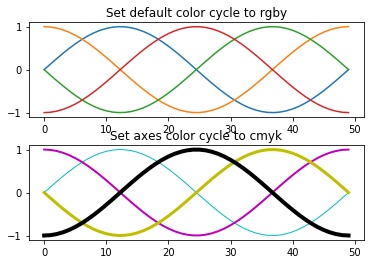

In [12]:
custom_cycler = (cycler(color=['c', 'm', 'y', 'k']) +
                 cycler(lw=[1, 2, 3, 4]))

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(yy)
ax0.set_title('Set default color cycle to rgby')

# custom_cycler
ax1.set_prop_cycle(custom_cycler)
ax1.plot(yy)
ax1.set_title('Set axes color cycle to cmyk')

# Add a bit more space between the two plots.
fig.subplots_adjust(hspace=0.3)
plt.show()

Setting ``prop_cycler`` in the ``matplotlibrc`` file or style files
-------------------------------------------------------------------

Remember, if you want to set a custom ``prop_cycler`` in your
``.matplotlibrc`` file or a style file (``style.mplstyle``), you can set the
``axes.prop_cycle`` property:

.. code-block:: python

   axes.prop_cycle    : cycler(color='bgrcmyk')

Cycling through multiple properties
-----------------------------------

You can add cyclers:

.. code-block:: python

   from cycler import cycler
   cc = (cycler(color=list('rgb')) +
         cycler(linestyle=['-', '--', '-.']))
   for d in cc:
       print(d)

Results in:

.. code-block:: python

    {'color': 'r', 'linestyle': '-'}
    {'color': 'g', 'linestyle': '--'}
    {'color': 'b', 'linestyle': '-.'}


You can multiply cyclers:

.. code-block:: python

    from cycler import cycler
    cc = (cycler(color=list('rgb')) *
          cycler(linestyle=['-', '--', '-.']))
    for d in cc:
        print(d)

Results in:

.. code-block:: python

    {'color': 'r', 'linestyle': '-'}
    {'color': 'r', 'linestyle': '--'}
    {'color': 'r', 'linestyle': '-.'}
    {'color': 'g', 'linestyle': '-'}
    {'color': 'g', 'linestyle': '--'}
    {'color': 'g', 'linestyle': '-.'}
    {'color': 'b', 'linestyle': '-'}
    {'color': 'b', 'linestyle': '--'}
    {'color': 'b', 'linestyle': '-.'}

